In [1]:
from pycocotools.coco import COCO
import numpy as np
import random
import os
import cv2

### For visualizing the outputs ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
dataDir='/home/hungnq/hungnq_2/yolov7/coco'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

# Initialize the COCO api for instance annotations
coco=COCO(annFile)

# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

print(cats)

loading annotations into memory...
Done (t=1.05s)
creating index...
index created!
[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, {'supercategory': 'animal', 'id': 17, 'n

In [3]:
filterClasses = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light','fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',]

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(supNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

Number of images containing all the  classes: 2693


### test image and annotations

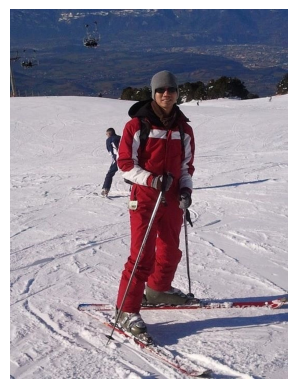

In [185]:
# load and display a random image
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = cv2.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))
I = cv2.cvtColor(I, cv2.COLOR_RGB2BGR)

plt.axis('off')
plt.imshow(I)
plt.show()

In [183]:
img

{'license': 3,
 'file_name': '000000038678.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000038678.jpg',
 'height': 640,
 'width': 480,
 'date_captured': '2013-11-20 00:49:13',
 'flickr_url': 'http://farm5.staticflickr.com/4091/5004764091_119e7e1a9e_z.jpg',
 'id': 38678}

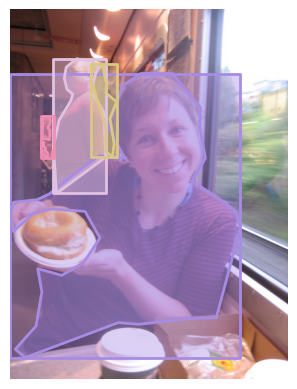

In [184]:
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)

In [40]:
annIds

[488647, 497456, 522324, 528558, 537826, 1691176]

In [17]:
print(anns)

NameError: name 'anns' is not defined

### Create custom dataset

In [4]:
# Create custom dataset for training

# Create a directory to store the images and annotations 
images = coco.loadImgs(imgIds)
images[0]

{'license': 3,
 'file_name': '000000532481.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000532481.jpg',
 'height': 426,
 'width': 640,
 'date_captured': '2013-11-20 16:28:24',
 'flickr_url': 'http://farm7.staticflickr.com/6048/5915494136_da3cfa7c5a_z.jpg',
 'id': 532481}

In [55]:
# !mkdir -p /home/hungnq/hungnq_2/yolov7/coco/custom/

In [5]:
import cv2

def write_images_path(sets, save_dir, data_file="train_custom"):
    """write the path leading to the images folder -> a txt file"""
    with open(f"{save_dir}/{data_file}.txt", "w") as f:
        for img in sets:
            f.write(f"./images/{data_file}/{img['file_name']}\n")
    print(f"Saved {data_file}.txt in {save_dir}")


def write_images(sets, origin_dir, save_dir, origin_type, save_set_type):
    """write the images corresponding to the sets -> a images folder"""
    if not os.path.exists(f"{save_dir}/images/{save_set_type}"):
        os.makedirs(f"{save_dir}/images/{save_set_type}")
    for image in sets:
        I = cv2.imread('{}/images/{}/{}'.format(origin_dir, origin_type, image['file_name']))
        cv2.imwrite(f"{save_dir}/images/{save_set_type}/{image['file_name']}", I)
    print(f"Saved {len(sets)} images in {save_dir}/images/{save_set_type}")


def write_annotations(sets, save_dir, setType):
    """write the annotations corresponding to the sets -> a label folder"""
    if not os.path.exists(f"{save_dir}/labels/{setType}"):
        os.makedirs(f"{save_dir}/labels/{setType}")
    for image in sets:
        # get annotation
        annIds = coco.getAnnIds(imgIds=image['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(annIds)
        rename = image['file_name'].replace("jpg", "txt")
        with open(f"{save_dir}/labels/{setType}/{rename}", "w") as f:
            for ann in anns:
                x, y, w, h = ann['bbox']
                x_center = x + w/2
                y_center = y + h/2
                x_center /= image['width']
                y_center /= image['height']
                w /= image['width']
                h /= image['height']
                f.write(f"{ann['category_id']} {x_center} {y_center} {w} {h}\n")
    print(f"Saved annotaion for {setType} in {save_dir}/labels/{setType}")

In [6]:
# split distribution

train, val, test = 0.8, 0.1, 0.1
num_train = int(train * len(images))
num_val = int(val * len(images))
num_test = int(test * len(images))

train_images = images[:num_train]
val_images = images[num_train:num_train+num_val]
test_images = images[num_train+num_val:]

In [7]:
import time

start = time.time()
# add custom folder to dataDir
dataDir = "/home/hungnq/hungnq_2/yolov7/coco"
origin_tupe = "val2017"
save_dir = "/home/hungnq/hungnq_2/yolov7/coco/custom"

"""Create the path leading to images folder"""
write_images_path(train_images, save_dir, data_file="train")
write_images_path(val_images, save_dir, data_file="val")
write_images_path(test_images, save_dir, data_file="test")
"""store images in the images folder"""
write_images(sets=train_images, origin_dir=dataDir, save_dir=save_dir, origin_type="val2017", save_set_type="train")
write_images(sets=val_images, origin_dir=dataDir, save_dir=save_dir, origin_type="val2017", save_set_type="val")
write_images(sets=test_images, origin_dir=dataDir, save_dir=save_dir, origin_type="val2017", save_set_type="test")
"""store annotations in the label folder"""
write_annotations(train_images, save_dir, setType="train")
write_annotations(val_images, save_dir, setType="val")
write_annotations(test_images, save_dir, setType="test")
f"Time taken: {time.time() - start}"

Saved train.txt in /home/hungnq/hungnq_2/yolov7/coco/custom
Saved val.txt in /home/hungnq/hungnq_2/yolov7/coco/custom
Saved test.txt in /home/hungnq/hungnq_2/yolov7/coco/custom
Saved 2154 images in /home/hungnq/hungnq_2/yolov7/coco/custom/images/train
Saved 269 images in /home/hungnq/hungnq_2/yolov7/coco/custom/images/val
Saved 270 images in /home/hungnq/hungnq_2/yolov7/coco/custom/images/test
Saved annotaion for train in /home/hungnq/hungnq_2/yolov7/coco/custom/labels/train
Saved annotaion for val in /home/hungnq/hungnq_2/yolov7/coco/custom/labels/val
Saved annotaion for test in /home/hungnq/hungnq_2/yolov7/coco/custom/labels/test


'Time taken: 38.965224266052246'

In [8]:
a = [[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]
a0 = a[0]
a0[:, None]

TypeError: list indices must be integers or slices, not tuple